In [201]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [131]:
df = pd.read_csv("letterCG.bin", sep = " ")

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   1509 non-null   object
 1   x-box   1509 non-null   int64 
 2   y-box   1509 non-null   int64 
 3   width   1509 non-null   int64 
 4   high    1509 non-null   int64 
 5   onpix   1509 non-null   int64 
 6   x-bar   1509 non-null   int64 
 7   y-bar   1509 non-null   int64 
 8   x2bar   1509 non-null   int64 
 9   y2bar   1509 non-null   int64 
 10  xybar   1509 non-null   int64 
 11  x2ybr   1509 non-null   int64 
 12  xy2br   1509 non-null   int64 
 13  x-ege   1509 non-null   int64 
 14  xegvy   1509 non-null   int64 
 15  y-ege   1509 non-null   int64 
 16  yegvx   1509 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 200.5+ KB


In [133]:
df.head()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


# 1.The data file contains numerical attributes that describe a letter and its corresponding class. Read the datafile “letterCG.data” and set all the numerical attributes as features. Split the data in to train and test sets.

In [134]:
#df = df.sample(frac=1)
X = df.drop(["Class"], axis = 1)
X

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,9,12,2,10,4,9
1505,6,11,7,8,4,6,7,10,9,10,7,11,2,12,4,9
1506,5,9,6,7,4,6,7,6,6,10,7,10,2,9,5,9
1507,6,11,7,8,5,5,8,7,6,8,8,15,4,9,6,6


In [135]:
from sklearn.preprocessing import OrdinalEncoder

In [136]:
oe = OrdinalEncoder()
y = oe.fit_transform(df[["Class"]])

<Axes: xlabel='Class', ylabel='count'>

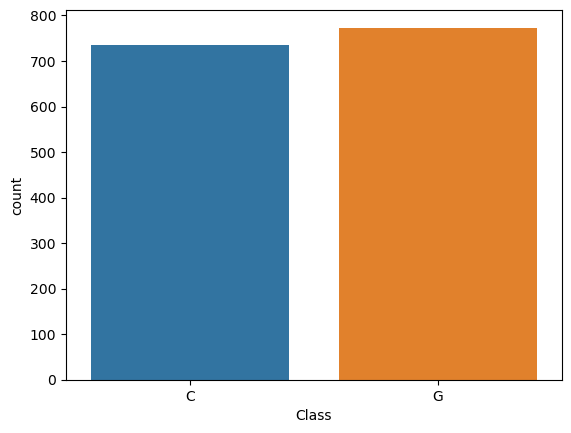

In [137]:
sns.countplot(df, x = df["Class"])

In [138]:
y

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]])

In [204]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [205]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [206]:
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(1056, 16) (453, 16) (1056, 1) (453, 1)


# 2. Fit a sequence of AdaBoostClassifier with varying number of weak learners ranging from 1 to 16, keeping the max_depth as 1. Plot the accuracy on test set against the number of weak learners. Use decision tree classifier as the base classifier.

In [219]:
acc_score_depth1 = []
for i in range(1,16):
    dtcObj1 = DecisionTreeClassifier(max_depth=1)
    abcObj = AdaBoostClassifier(estimator=dtcObj1, n_estimators=50, learning_rate=1)
    abcObj.fit(train_X.iloc[:,0:i], train_y)
    pred_y = abcObj.predict(test_X.iloc[:,0:i])
    acc_score_depth1.append(accuracy_score(test_y, pred_y)*100)

In [220]:
acc_score_depth1

[48.12362030905077,
 51.65562913907284,
 58.05739514348785,
 56.29139072847682,
 67.54966887417218,
 79.69094922737307,
 84.10596026490066,
 84.76821192052981,
 91.16997792494482,
 90.28697571743929,
 89.84547461368653,
 92.71523178807946,
 95.58498896247241,
 95.58498896247241,
 95.58498896247241]

# 3. Repeat step2 with max_depth set as 2.

In [221]:
acc_score_depth2 = []
for i in range(1,16):
    dtcObj1 = DecisionTreeClassifier(max_depth=2)
    abcObj = AdaBoostClassifier(estimator=dtcObj1, n_estimators=50, learning_rate=1)
    abcObj.fit(train_X.iloc[:,0:i], train_y)
    pred_y = abcObj.predict(test_X.iloc[:,0:i])
    acc_score_depth2.append(accuracy_score(test_y, pred_y)*100)

In [222]:
acc_score_depth2

[48.12362030905077,
 46.57836644591612,
 51.87637969094923,
 50.993377483443716,
 65.34216335540839,
 84.32671081677704,
 86.31346578366445,
 90.06622516556291,
 92.49448123620309,
 95.36423841059603,
 93.37748344370861,
 96.24724061810154,
 97.35099337748345,
 98.01324503311258,
 97.13024282560706]

Text(0, 0.5, 'Accuracy score')

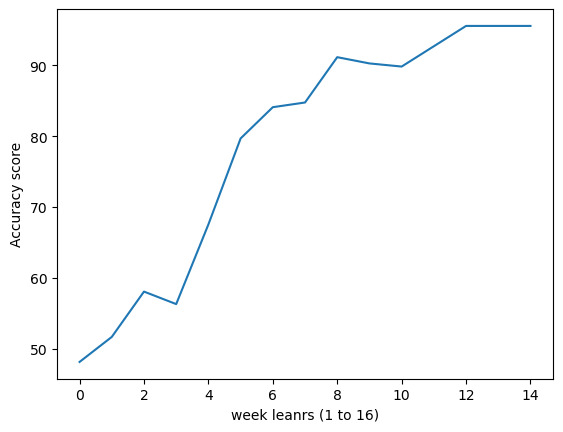

In [223]:
plt.plot( acc_score_depth1)
plt.xlabel("week leanrs (1 to 16)")
plt.ylabel("Accuracy score")

Text(0, 0.5, 'Accuracy score')

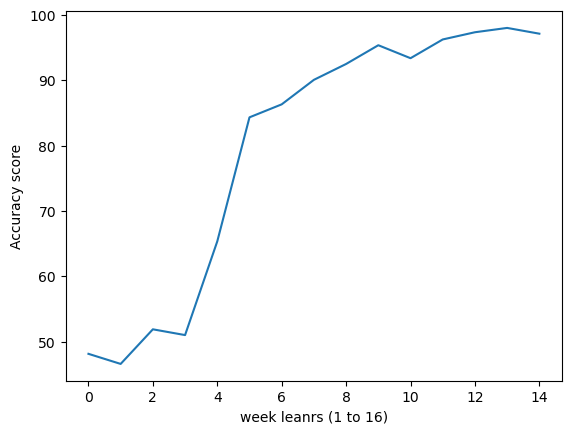

In [224]:
plt.plot( acc_score_depth2)
plt.xlabel("week leanrs (1 to 16)")
plt.ylabel("Accuracy score")